In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import *
from gbm import *

In [5]:
last_id = 287
backtest_start = 55
backtest_end = 56

In [14]:
prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _, discounts = MultivariateGBMSimulationTS(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30, implied_volatility=True)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=discounts, risk_neutral=False, verbose=False))
    
    prices.append(np.mean(payoff))



100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


In [15]:
path_rog

array([237.55      , 237.25      , 237.75      , 241.3       ,
       233.85      , 237.7       , 238.15      , 237.25      ,
       237.15      , 236.4       , 238.15      , 238.1       ,
       236.75      , 238.75      , 239.6       , 238.        ,
       236.85      , 237.6       , 237.15      , 237.6       ,
       236.6       , 238.35      , 238.7       , 236.9       ,
       235.9       , 236.4       , 236.05      , 239.6       ,
       246.3       , 250.95      , 249.95      , 249.45      ,
       253.3       , 254.3       , 253.7       , 252.65      ,
       245.9       , 244.35      , 245.2       , 244.05      ,
       243.5       , 245.        , 244.3       , 243.7       ,
       242.45      , 244.5       , 251.85      , 254.35      ,
       251.3       , 251.45      , 252.25      , 253.9       ,
       250.6       , 252.5       , 250.85      , 250.1       ,
       251.515195  , 252.15838656, 255.1300968 , 255.31040592,
       258.41706781, 262.37778127, 264.09364646, 262.12

In [16]:
prices

[1006.4536109623879]

In [9]:
price_1 = [prices.copy()]
price_1

[[1006.4536109623879]]

In [99]:
prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _ = MultivariateGBMSimulationAV(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30, implied_volatility=True)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=0.01107, risk_neutral=True, verbose=False))
    # print(path_rog)
    # print(result[0][0].flatten())
    
    prices.append(np.mean(payoff))



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/230 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

In [100]:
price_1.append(prices.copy())

In [104]:
price_1

[[970.3111169767072,
  975.4368135410966,
  1022.2441912775325,
  1010.5184672848283,
  1014.483740010248],
 [990.3514801922461,
  981.0002196042493,
  1024.0273644844538,
  1029.3325264024327,
  1028.5516069034275]]

d:\mh4518_simulation_in_fin\notebooks\../utils\utils.py:241: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  real_price['Date'] = pd.to_datetime(real_price['Date'], dayfirst=True)


4051.782188551031


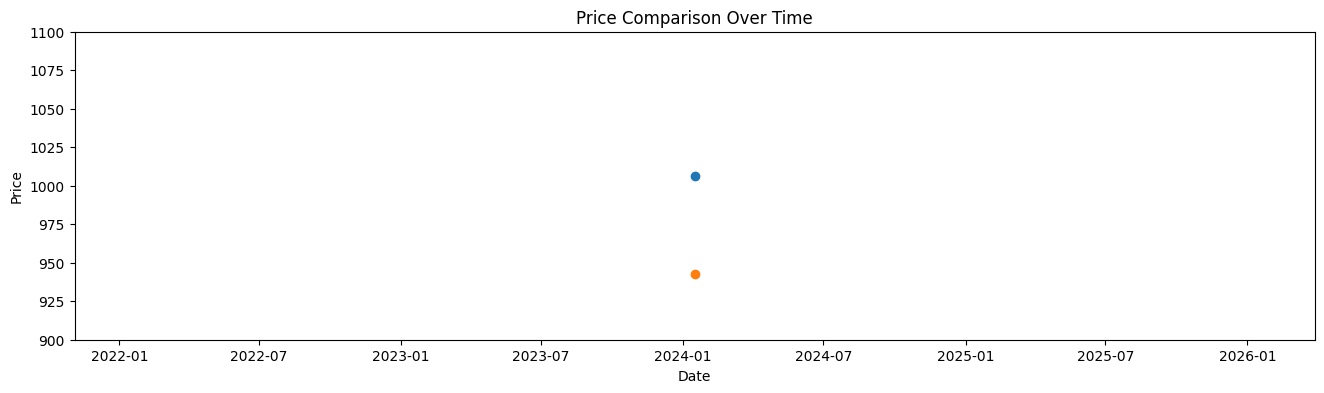

In [10]:
combined_df = retrieve_data()

evaluation_plot(
    backtest_start,
    backtest_end,
    combined_df,
    price_1,
    ylim=(900, 1100)
    )

In [102]:
combined_df.iloc[50:60, :]

,Date,ROG_Last_Price,ROG_IVOL,CFR_Last_Price,CFR_IVOL,ZURN_Last_Price,ZURN_IVOL,Risk_Free_Rate
50,2024-01-09,252.25,17.3357,112.75,27.6846,439.0,13.5786,1.3758
51,2024-01-10,253.90,17.1207,112.30,27.6068,435.9,14.2341,1.3806
52,2024-01-11,250.60,17.2272,110.45,27.5545,432.8,13.7492,1.3729
53,2024-01-12,252.50,16.9516,110.25,27.8636,436.9,13.6311,1.3376
54,2024-01-15,250.85,17.1497,109.85,27.6874,439.0,13.5356,1.3421
55,2024-01-16,250.10,17.1424,108.00,27.7113,442.4,13.1857,1.3382
56,2024-01-17,247.25,17.2372,105.40,28.9632,434.3,13.7452,1.3608
57,2024-01-18,245.95,17.2125,116.35,26.0605,430.2,14.1039,1.3585
58,2024-01-19,244.10,16.8093,116.40,27.2070,434.2,13.3972,1.3713
59,2024-01-22,247.80,16.9903,117.65,24.8685,441.8,12.0093,1.3693
